In [88]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, BatchNormalization, Activation, Flatten, Add
from tensorflow.keras.models import Model


In [89]:
input_shape = (224, 224, 3)


In [90]:
def identity_block(X, f, filters):
    
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = BatchNormalization()(X)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X


In [91]:
def convolutional_block(X, f, filters, s=2):
    
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(s,s), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X


In [92]:
import numpy as np

def average_pooling2d(input, pool_size=(2, 2)):
    # Get input shape and pool size
    batch_size, height, width, channels = input.shape
    pool_height, pool_width = pool_size

    # Calculate output shape
    out_height = height // pool_height
    out_width = width // pool_width

    # Initialize output
    output = np.zeros((batch_size, out_height, out_width, channels))

    # Loop over each element of the output
    for i in range(out_height):
        for j in range(out_width):
            # Compute the average of the pool
            pool = input[:, i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width, :]
            output[:, i, j, :] = np.mean(pool, axis=(1, 2))

    return output


In [93]:
from tensorflow.keras.layers import AveragePooling2D
def ResNet50(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same')(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(X)
    
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, f=3, filters=[64, 64, 256])
    X = identity_block(X, f=3, filters=[64, 64, 256])
    
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, f=3, filters=[128, 128, 512])
    X = identity_block(X, f=3, filters=[128, 128, 512])
    
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, f=3, filters=[512, 512, 2048])
    X = identity_block(X, f=3, filters=[512, 512, 2048])
    
    X = AveragePooling2D(pool_size=(2,2))(X)
    
    X = Flatten()(X)
    X = Dense(units=2, activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=X)
    
    return model



In [94]:
model = ResNet50(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_308 (Conv2D)            (None, 112, 112, 64  9472        ['input_21[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_308 (Batch  (None, 112, 112, 64  256        ['conv2d_308[0][0]']             
 Normalization)                 )                                                           

                                                                                                  
 conv2d_318 (Conv2D)            (None, 56, 56, 256)  16640       ['activation_288[0][0]']         
                                                                                                  
 batch_normalization_318 (Batch  (None, 56, 56, 256)  1024       ['conv2d_318[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 add_93 (Add)                   (None, 56, 56, 256)  0           ['batch_normalization_318[0][0]',
                                                                  'activation_286[0][0]']         
                                                                                                  
 activation_289 (Activation)    (None, 56, 56, 256)  0           ['add_93[0][0]']                 
          

 add_96 (Add)                   (None, 28, 28, 512)  0           ['batch_normalization_328[0][0]',
                                                                  'activation_295[0][0]']         
                                                                                                  
 activation_298 (Activation)    (None, 28, 28, 512)  0           ['add_96[0][0]']                 
                                                                                                  
 conv2d_329 (Conv2D)            (None, 14, 14, 256)  131328      ['activation_298[0][0]']         
                                                                                                  
 batch_normalization_329 (Batch  (None, 14, 14, 256)  1024       ['conv2d_329[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 add_99 (Add)                   (None, 14, 14, 1024  0           ['batch_normalization_338[0][0]',
                                )                                 'activation_304[0][0]']         
                                                                                                  
 activation_307 (Activation)    (None, 14, 14, 1024  0           ['add_99[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_339 (Conv2D)            (None, 14, 14, 256)  262400      ['activation_307[0][0]']         
                                                                                                  
 batch_normalization_339 (Batch  (None, 14, 14, 256)  1024       ['conv2d_339[0][0]']             
 Normalization)                                                                                   
          

 activation_316 (Activation)    (None, 7, 7, 2048)   0           ['add_102[0][0]']                
                                                                                                  
 conv2d_349 (Conv2D)            (None, 7, 7, 512)    1049088     ['activation_316[0][0]']         
                                                                                                  
 batch_normalization_349 (Batch  (None, 7, 7, 512)   2048        ['conv2d_349[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_317 (Activation)    (None, 7, 7, 512)    0           ['batch_normalization_349[0][0]']
                                                                                                  
 conv2d_350 (Conv2D)            (None, 7, 7, 512)    2359808     ['activation_317[0][0]']         
          

In [95]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset directory
data_dir = 'F:/Dataset_Abdullah/Resnet_dataset/Test/'

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Define the data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Load the training set
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training'
)

# Load the validation set
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation'
)

# Extract the training and validation data and labels
x_train, y_train = train_generator.next()
x_val, y_val = val_generator.next()


Found 296 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [96]:
# Define the number of epochs and batch size
num_epochs = 20
batch_size = 32

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)


Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 1.1376 - accuracy: 0.5000 - val_loss: 1.0154 - val_accuracy: 0.4688
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 23.3431 - accuracy: 0.4688 - val_loss: 10.5825 - val_accuracy: 0.4688
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 1.2533 - accuracy: 0.6875 - val_loss: 64.0879 - val_accuracy: 0.4688
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 3.2626 - accuracy: 0.5938 - val_loss: 126.9449 - val_accuracy: 0.4688
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 1.1004 - accuracy: 0.6250 - val_loss: 39.4174 - val_accuracy: 0.4688
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 1.0625 - accuracy: 0.4688 - val_loss: 0.6944 - val_accuracy: 0.4062
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 0.2523 - accuracy: 0.8438 - val_loss: 0.6932 - val_accuracy: 0.4375
Epoch 8/20
1/1 [===================

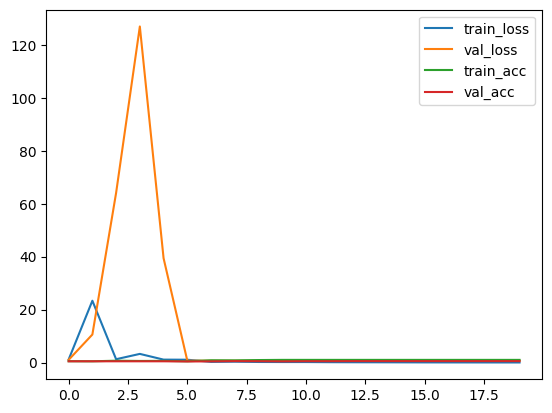

In [100]:
import matplotlib.pyplot as plt

# Plot the training and validation curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [101]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# Generate graphical representation of the model
plot_model(model, to_file='resnet50.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
